In [1]:
#/usr/bin/python3.8
# Use jupyter notebook with python 3+ 
"""
Auth : Al Sabawi
Date: Mar 14, 2020
"""
# Need the following libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Source

#### Johns Hupkins Whiting School of Engineering COVID-19 Data Repository at https://github.com/CSSEGISandData

## Download the data to your computer daily

In [2]:
## Download the latest data file from:
## https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series
## File name "time_series_19-covid-Confirmed.csv"  for all confirmed cases in the world by region
## *** DOWNLOAD to local directory ***
filename = './time_series_19-covid-Confirmed.csv'
df_confirmed = pd.read_csv(filename)

## Separate the dates to use as an index later
dates = df_confirmed.columns[4:]
## Filter for the USA data only 
usa = df_confirmed[df_confirmed['Country/Region'].values == 'US'].copy(deep=True)

usad = usa[dates].copy(deep=True)
last_date = usa[dates].columns[-1]

## Put the US data into a DataFrame Series and give it a name
us_df_cumulative = pd.DataFrame(usa[dates].sum(), columns=['Actual USA COVID-19 Cases'])

# Check: These 2 following prints should give the same number on same Last Dates data is collected
#print(last_date, usad[last_date].sum())
#print(us_df_cumulative[-1:])

## Plot the confirmed COVID-19 Cases

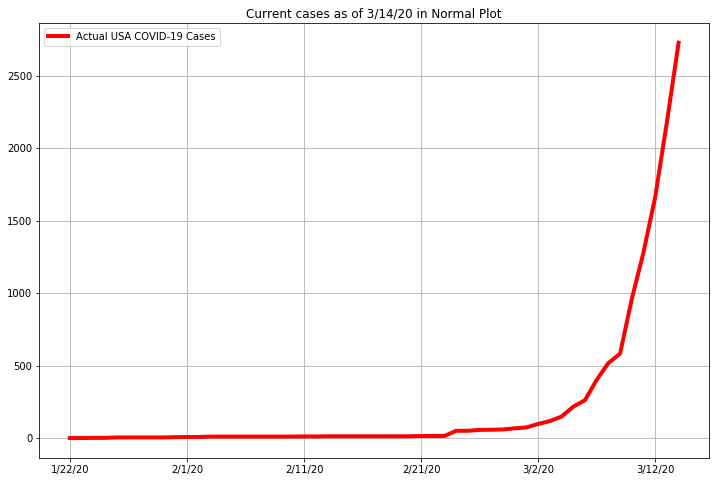

In [4]:
## Plot the raw data (not logarithmic)
fig, ax = plt.subplots(figsize=(12,8))
#us_df = pd.DataFrame(usa[dates].sum(), columns=['Actual USA COVID-19 Cases'])

us_df_cumulative.plot(ax=ax,c='r', lw=4,title='Current cases as of '+str(us_df_cumulative.index[-1])+' in Normal Plot')
ax.grid(True,which="both")

## Calculate R-naught 

### Form more info on R-naught, check https://en.wikipedia.org/wiki/Basic_reproduction_number

In [5]:
## ASSUMPTION:
##    1) In early stages of contagion, there is NO limiting factor for the spreading of virus
##    2) Uninficted Population is very close to total population
##    3) Assume Free movement (No lockdowns) of individuals in and out of areas affected by virus
##

## Find Last day's total cases
TotalCasesToDate = us_df_cumulative['Actual USA COVID-19 Cases'][-1:][0]
print("Total cases as of " +str(us_df_cumulative.index[-1:][0]) + "(End of day) is "+str(TotalCasesToDate),
      'cases' )

## Create a new Series that calculates the difference from day to day
ChangeFromDay2Next = us_df_cumulative['Actual USA COVID-19 Cases'].diff(1)

ChangeFromDay2NextPercent = us_df_cumulative['Actual USA COVID-19 Cases'].pct_change(1)

## Find the Average change from day to day
AverageChangeFromDay2Next = ChangeFromDay2Next.mean()
print("Average case count change from one day to next = ", np.round(AverageChangeFromDay2Next,2),' cases')

## Create a series of R0 by calculating the ratio of one day to the day before
r0 = [] # Will record the ratio day to day, start from day 1 to last day
for day in range(1,len(ChangeFromDay2Next)):
    if(ChangeFromDay2Next[day-1:][0] == 0): # Avoid dividing by zero
        r0.append(0)
    else:
        r0.append(ChangeFromDay2Next[day:][0]/ChangeFromDay2Next[day-1:][0] )  

## Look back 20 days only. This is the most relevant data        
GoBackDays = 20
dict0 = {'Date' : us_df_cumulative.index[-GoBackDays:].values, 'R-Naught' : r0[-GoBackDays:]}
R_Naught= pd.DataFrame(dict0)    
R_Naught = R_Naught.set_index('Date')

#print('ChangeFromDay2Next' , ChangeFromDay2Next[-1:][0])
DailyDelta = ChangeFromDay2Next[-1:][0]

#print(us_df_cumulative['Actual USA COVID-19 Cases'][-2:][0])
DailyDeltaPercent = 100 * DailyDelta /us_df_cumulative['Actual USA COVID-19 Cases'][-2:][0]

print("Change is USA confirmed COVID-19 cases FROM",
      str(us_df_cumulative.index[-2:][0]), "TO", 
      str(us_df_cumulative.index[-1:][0])+ "(End of day) is " + str(int(DailyDelta)),'cases',
      "OR " +str(np.round(DailyDeltaPercent,2)) + '% in this period. ', '\nThis is', 
      np.round((DailyDelta/AverageChangeFromDay2Next),2) ,
      'Times the Average count in daily changes. \nThe current Average PERCENT(%) change from day to day is' , 
      str(np.round(100*ChangeFromDay2NextPercent.mean(),2) )+'%', 
      "This means it's Above or Below (if negative) the avarage daily % change by "+ str(np.round(100*ChangeFromDay2NextPercent.mean(),2) )+'%')
print("R-naught value as of end-of-day",str(us_df_cumulative.index[-1:][0]), 'IS', 
      np.round(R_Naught['R-Naught'][-1:][0],4) )
print('The average R-naught from the past',GoBackDays,'days is', np.round( R_Naught['R-Naught'].mean(),4))

Total cases as of 3/14/20(End of day) is 2727 cases
Average case count change from one day to next =  52.42  cases
Change is USA confirmed COVID-19 cases FROM 3/13/20 TO 3/14/20(End of day) is 548 cases OR 25.15% in this period.  
This is 10.45 Times the Average count in daily changes. 
The current Average PERCENT(%) change from day to day is 20.73% This means it's Above or Below (if negative) the avarage daily % change by 20.73%
R-naught value as of end-of-day 3/14/20 IS 1.062
The average R-naught from the past 20 days is 1.5448


## Plot R-naught as a Time Series

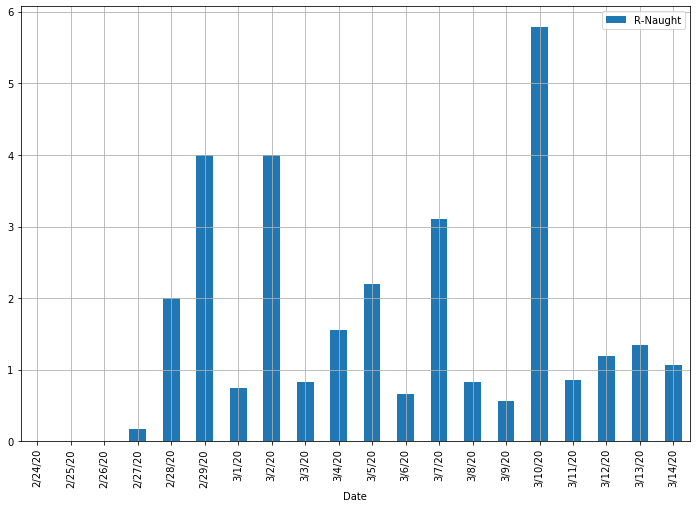

In [6]:
R_Naught.plot(kind='bar',figsize=(12,8),grid=True)

### It's plausible to assume that US officials hit the panic button at the end of 3/10/2020 when R-naught spiked to near 6. R-naught should not be allowed to exceed 1.0 for the spread to die down